基于评分卡的风控模型开发    
数据集GiveMeSomeCredit，15万样本数据    
https://www.kaggle.com/c/GiveMeSomeCredit/data     
使用WOE进行特征变换，IV进行特征筛选，LR构建风控模型，并对模型评分规则进行可解释性说明     
– 基本属性：包括了借款人当时的年龄    
– 偿债能力：包括了借款人的月收入、负债比率    
– 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次数、两年内90天或高于90天逾期的次数    
– 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。    
– 其他因素：包括了借款人的家属数量    

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-加载数据" data-toc-modified-id="1-加载数据-1">1 加载数据</a></span></li><li><span><a href="#2-EDA" data-toc-modified-id="2-EDA-2">2 EDA</a></span><ul class="toc-item"><li><span><a href="#2.1-缺失值" data-toc-modified-id="2.1-缺失值-2.1">2.1 缺失值</a></span><ul class="toc-item"><li><span><a href="#可视化缺失值" data-toc-modified-id="可视化缺失值-2.1.1">可视化缺失值</a></span></li><li><span><a href="#填充缺失值" data-toc-modified-id="填充缺失值-2.1.2">填充缺失值</a></span></li></ul></li><li><span><a href="#2.2-探索目标值分布" data-toc-modified-id="2.2-探索目标值分布-2.2">2.2 探索目标值分布</a></span></li><li><span><a href="#2.3-RevolvingUtilizationOfUnsecuredLines" data-toc-modified-id="2.3-RevolvingUtilizationOfUnsecuredLines-2.3">2.3 RevolvingUtilizationOfUnsecuredLines</a></span><ul class="toc-item"><li><span><a href="#2.3.1-RevolvingUtilizationOfUnsecuredLines-样本数分布统计" data-toc-modified-id="2.3.1-RevolvingUtilizationOfUnsecuredLines-样本数分布统计-2.3.1">2.3.1 RevolvingUtilizationOfUnsecuredLines 样本数分布统计</a></span></li><li><span><a href="#2.3.2-RevolvingUtilizationOfUnsecuredLines中违约情况" data-toc-modified-id="2.3.2-RevolvingUtilizationOfUnsecuredLines中违约情况-2.3.2">2.3.2 RevolvingUtilizationOfUnsecuredLines中违约情况</a></span></li></ul></li><li><span><a href="#2.4-age" data-toc-modified-id="2.4-age-2.4">2.4 age</a></span><ul class="toc-item"><li><span><a href="#2.4.1-不同年龄的样本数" data-toc-modified-id="2.4.1-不同年龄的样本数-2.4.1">2.4.1 不同年龄的样本数</a></span></li><li><span><a href="#2.4.2-不同年龄下违约情况" data-toc-modified-id="2.4.2-不同年龄下违约情况-2.4.2">2.4.2 不同年龄下违约情况</a></span></li></ul></li><li><span><a href="#2.5-NumberOfTime30-59DaysPastDueNotWorse" data-toc-modified-id="2.5-NumberOfTime30-59DaysPastDueNotWorse-2.5">2.5 NumberOfTime30-59DaysPastDueNotWorse</a></span><ul class="toc-item"><li><span><a href="#2.5.1-30-59天不同逾期次数的样本数" data-toc-modified-id="2.5.1-30-59天不同逾期次数的样本数-2.5.1">2.5.1 30-59天不同逾期次数的样本数</a></span></li><li><span><a href="#2.5.2-30-59天不同逾期次数中违约与未违约样本数统计" data-toc-modified-id="2.5.2-30-59天不同逾期次数中违约与未违约样本数统计-2.5.2">2.5.2 30-59天不同逾期次数中违约与未违约样本数统计</a></span></li></ul></li><li><span><a href="#2.6-DebtRatio" data-toc-modified-id="2.6-DebtRatio-2.6">2.6 DebtRatio</a></span><ul class="toc-item"><li><span><a href="#2.6.1-债务比的分布" data-toc-modified-id="2.6.1-债务比的分布-2.6.1">2.6.1 债务比的分布</a></span></li><li><span><a href="#2.6.2-违约与不违约下的债务比的分布" data-toc-modified-id="2.6.2-违约与不违约下的债务比的分布-2.6.2">2.6.2 违约与不违约下的债务比的分布</a></span></li></ul></li><li><span><a href="#2.7-MonthlyIncome-每月收入" data-toc-modified-id="2.7-MonthlyIncome-每月收入-2.7">2.7 MonthlyIncome 每月收入</a></span><ul class="toc-item"><li><span><a href="#2.7.1--每月收入的分布" data-toc-modified-id="2.7.1--每月收入的分布-2.7.1">2.7.1  每月收入的分布</a></span></li><li><span><a href="#2.7.2-违约与未违约用户的每月收入分布" data-toc-modified-id="2.7.2-违约与未违约用户的每月收入分布-2.7.2">2.7.2 违约与未违约用户的每月收入分布</a></span></li></ul></li><li><span><a href="#2.8-违约与未违约样本的公开贷款和信用额度的数量分布" data-toc-modified-id="2.8-违约与未违约样本的公开贷款和信用额度的数量分布-2.8">2.8 违约与未违约样本的公开贷款和信用额度的数量分布</a></span></li><li><span><a href="#2.9-违约与未违约样本的NumberOfTimes90DaysLate统计" data-toc-modified-id="2.9-违约与未违约样本的NumberOfTimes90DaysLate统计-2.9">2.9 违约与未违约样本的NumberOfTimes90DaysLate统计</a></span></li><li><span><a href="#2.10-违约与未违约样本的-NumberRealEstateLoansOrLines" data-toc-modified-id="2.10-违约与未违约样本的-NumberRealEstateLoansOrLines-2.10">2.10 违约与未违约样本的 NumberRealEstateLoansOrLines</a></span></li><li><span><a href="#2.11-违约与未违约样本的NumberOfTime60-89DaysPastDueNotWorse分布" data-toc-modified-id="2.11-违约与未违约样本的NumberOfTime60-89DaysPastDueNotWorse分布-2.11">2.11 违约与未违约样本的NumberOfTime60-89DaysPastDueNotWorse分布</a></span></li><li><span><a href="#2.12-违约与未违约样本的NumberOfDependents-的分布" data-toc-modified-id="2.12-违约与未违约样本的NumberOfDependents-的分布-2.12">2.12 违约与未违约样本的NumberOfDependents 的分布</a></span></li></ul></li><li><span><a href="#3-数据分箱" data-toc-modified-id="3-数据分箱-3">3 数据分箱</a></span><ul class="toc-item"><li><span><a href="#3.1-对RevolvingUtilizationOfUnsecuredLines分5箱" data-toc-modified-id="3.1-对RevolvingUtilizationOfUnsecuredLines分5箱-3.1">3.1 对RevolvingUtilizationOfUnsecuredLines分5箱</a></span></li><li><span><a href="#3.2-age分6箱" data-toc-modified-id="3.2-age分6箱-3.2">3.2 age分6箱</a></span></li><li><span><a href="#3.3-NumberOfTime30-59DaysPastDueNotWorse分10桶" data-toc-modified-id="3.3-NumberOfTime30-59DaysPastDueNotWorse分10桶-3.3">3.3 NumberOfTime30-59DaysPastDueNotWorse分10桶</a></span></li><li><span><a href="#3.4-DebtRatio分5桶" data-toc-modified-id="3.4-DebtRatio分5桶-3.4">3.4 DebtRatio分5桶</a></span></li><li><span><a href="#3.5-MonthlyIncome-分5桶" data-toc-modified-id="3.5-MonthlyIncome-分5桶-3.5">3.5 MonthlyIncome 分5桶</a></span></li><li><span><a href="#3.6-NumberOfOpenCreditLinesAndLoans分5桶" data-toc-modified-id="3.6-NumberOfOpenCreditLinesAndLoans分5桶-3.6">3.6 NumberOfOpenCreditLinesAndLoans分5桶</a></span></li><li><span><a href="#3.7-NumberOfTimes90DaysLate分10桶" data-toc-modified-id="3.7-NumberOfTimes90DaysLate分10桶-3.7">3.7 NumberOfTimes90DaysLate分10桶</a></span></li><li><span><a href="#3.8-NumberRealEstateLoansOrLines分5段" data-toc-modified-id="3.8-NumberRealEstateLoansOrLines分5段-3.8">3.8 NumberRealEstateLoansOrLines分5段</a></span></li><li><span><a href="#3.9-NumberOfTime60-89DaysPastDueNotWorse分10段" data-toc-modified-id="3.9-NumberOfTime60-89DaysPastDueNotWorse分10段-3.9">3.9 NumberOfTime60-89DaysPastDueNotWorse分10段</a></span></li><li><span><a href="#3.10-NumberOfDependents分6桶" data-toc-modified-id="3.10-NumberOfDependents分6桶-3.10">3.10 NumberOfDependents分6桶</a></span></li></ul></li><li><span><a href="#4-计算WOE和IV" data-toc-modified-id="4-计算WOE和IV-4">4 计算WOE和IV</a></span></li><li><span><a href="#5-根据IV->-0.1-选择特征" data-toc-modified-id="5-根据IV->-0.1-选择特征-5">5 根据IV &gt; 0.1 选择特征</a></span></li><li><span><a href="#6-获得所筛选特征的WOE的规则" data-toc-modified-id="6-获得所筛选特征的WOE的规则-6">6 获得所筛选特征的WOE的规则</a></span></li><li><span><a href="#7-逻辑回归建模" data-toc-modified-id="7-逻辑回归建模-7">7 逻辑回归建模</a></span><ul class="toc-item"><li><span><a href="#7.2-将训练集和验证集分开" data-toc-modified-id="7.2-将训练集和验证集分开-7.1">7.2 将训练集和验证集分开</a></span></li><li><span><a href="#7.3-训练及评估" data-toc-modified-id="7.3-训练及评估-7.2">7.3 训练及评估</a></span></li><li><span><a href="#7.4-可视化混淆矩阵" data-toc-modified-id="7.4-可视化混淆矩阵-7.3">7.4 可视化混淆矩阵</a></span></li></ul></li><li><span><a href="#8-评分卡" data-toc-modified-id="8-评分卡-8">8 评分卡</a></span><ul class="toc-item"><li><span><a href="#8.1-生成评分卡模型" data-toc-modified-id="8.1-生成评分卡模型-8.1">8.1 生成评分卡模型</a></span></li><li><span><a href="#8.2-应用评分卡模型计算评分" data-toc-modified-id="8.2-应用评分卡模型计算评分-8.2">8.2 应用评分卡模型计算评分</a></span><ul class="toc-item"><li><span><a href="#8.2.1--自定义评分卡转换函数" data-toc-modified-id="8.2.1--自定义评分卡转换函数-8.2.1">8.2.1  自定义评分卡转换函数</a></span></li><li><span><a href="#8.2.2-随机抽样查看评分" data-toc-modified-id="8.2.2-随机抽样查看评分-8.2.2">8.2.2 随机抽样查看评分</a></span></li></ul></li></ul></li><li><span><a href="#9-总结" data-toc-modified-id="9-总结-9">9 总结</a></span></li></ul></div>

In [2]:
import math
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_confusion_matrix

sns.set_style("darkgrid")
sns.set_context("notebook")

In [5]:
# 数据加载
data = pd.read_csv("F:\BI\第十五周\score_card\cs-training.csv")
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
data = data.iloc[:, 1:]

In [7]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

EDA

In [7]:
# 缺失值填充
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
# 使用中位数填充缺失值，并将数据类型修改为整数类型
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(
    data['NumberOfDependents'].median()).astype("int")
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())

In [10]:
data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

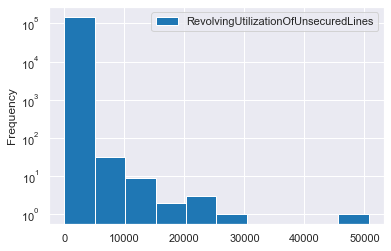

In [14]:
# RevolvingUtilizationOfUnsecuredLines 样本数分布统计
ax = data[['RevolvingUtilizationOfUnsecuredLines']].plot(kind='hist')
ax.set_yscale("log")

In [15]:
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [16]:
# RevolvingUtilizationOfUnsecuredLines 违约查看
groups = data.groupby("SeriousDlqin2yrs")['RevolvingUtilizationOfUnsecuredLines']
groups.describe()

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,139974.0,6.168855,256.126350,0.0,0.026983,0.133288,0.487686,50708.0
1,10026.0,4.367282,131.835778,0.0,0.398219,0.838853,1.000000,8328.0


SeriousDlqin2yrs
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: RevolvingUtilizationOfUnsecuredLines, dtype: object

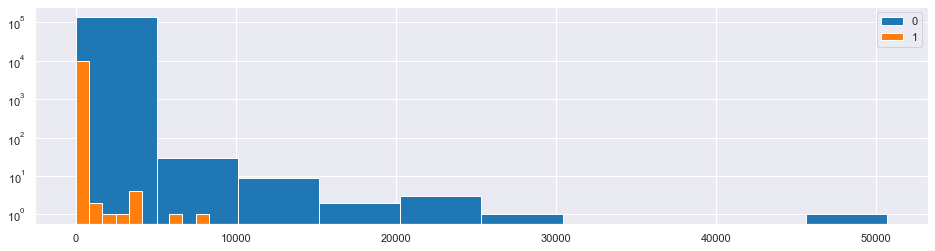

In [17]:
groups.hist(figsize=(16, 4), stacked=True, log=True, legend=True)

除房地产和汽车贷款等无分期付款债务外，信用卡和个人信用额度的总余额除以信贷限额很高时，反而没有违约。

age 

In [18]:
# 不同年龄样本
data['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

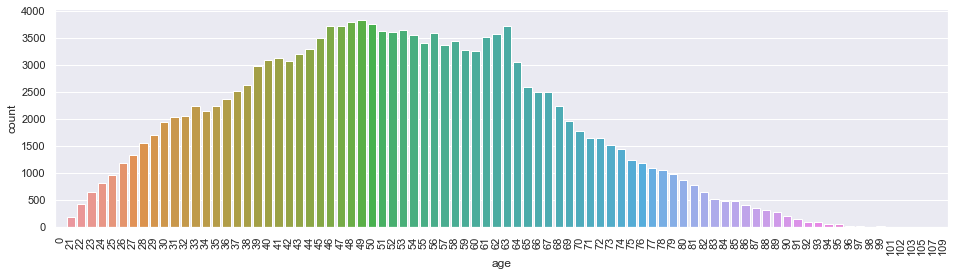

In [19]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(data=data, x='age')
_ = ax.set_xticklabels(sorted(data['age'].unique()), rotation=90)

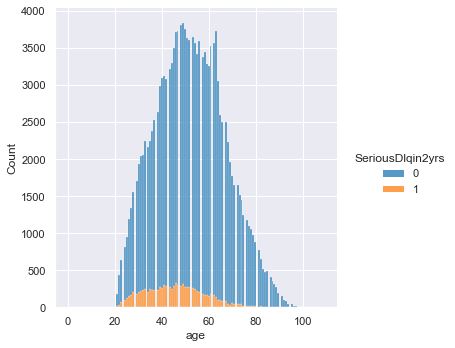

In [20]:
# 不同年龄违约情况
sns.displot(data=data, x='age', hue='SeriousDlqin2yrs', multiple="stack")

如果要保证每个分桶内都有正样本，则分组的bins可以是`[-math.inf, 30, 40, 50, 60, 70, math.inf]`

NumberOfTime30-59DaysPastDueNotWorse

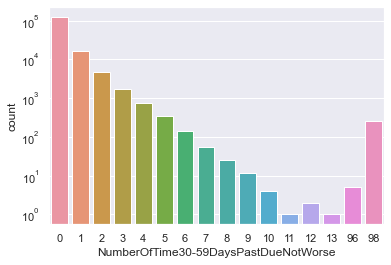

In [21]:
# 30-59天不同逾期次数的样本数
ax = sns.countplot(data=data, x='NumberOfTime30-59DaysPastDueNotWorse')
ax.set_yscale('log')

绝大多数样本没有发生过逾期

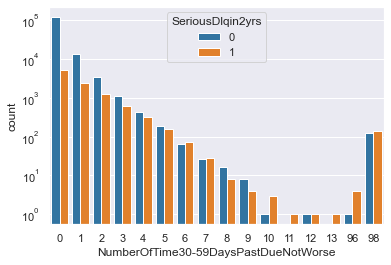

In [22]:
# 30-59天不同逾期次数中违约与未违约样本数统计
ax = sns.countplot(data=data,
                   x='NumberOfTime30-59DaysPastDueNotWorse',
                   hue='SeriousDlqin2yrs')
ax.set_yscale('log')

一共16个取值，为了保证分桶后，每一桶都有正样本，则分桶bins可以是`[-math.inf, 0, 1, 2, 3, 4, 5, 6, 7, 8, math.inf]`

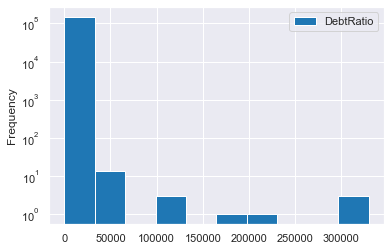

In [23]:
# 债务比
ax = data[['DebtRatio']].plot(kind='hist')
ax.set_yscale("log")

In [24]:
data['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [25]:
# 违约与不违约下的债务比的分布
groups = data.groupby("SeriousDlqin2yrs")['DebtRatio']
groups.describe()

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,139974.0,357.151168,2083.282060,0.0,0.173707,0.362659,0.865608,329664.0
1,10026.0,295.121066,1238.360283,0.0,0.193979,0.428227,0.892371,38793.0


SeriousDlqin2yrs
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DebtRatio, dtype: object

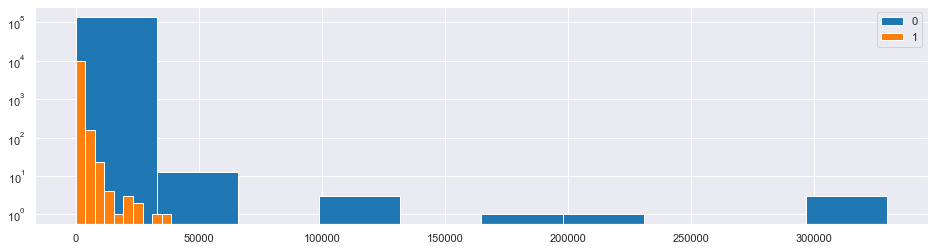

In [26]:
groups.hist(figsize=(16, 4), stacked=True, log=True, legend=True)

违约与未违约的债务比绝大部分集中在0~4W之间。债务比只在0-38793.0之间存在违约，且看起来债务比越低越容易违约。

In [27]:
# 每月收入
data['MonthlyIncome'].describe()

count    1.500000e+05
mean     6.418455e+03
std      1.289040e+04
min      0.000000e+00
25%      3.903000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

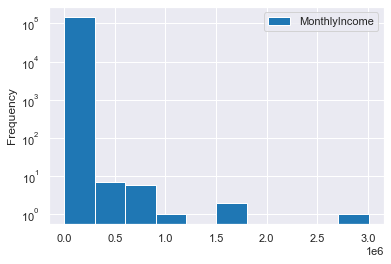

In [28]:
ax = data[['MonthlyIncome']].plot(kind='hist')
ax.set_yscale("log")

SeriousDlqin2yrs
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MonthlyIncome, dtype: object

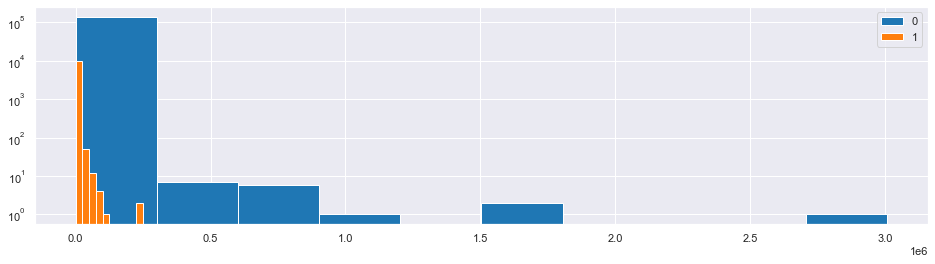

In [29]:
# 违约与未违约用户的每月收入分布
data.groupby("SeriousDlqin2yrs")['MonthlyIncome'].hist(figsize=(16, 4),
                                                     stacked=True,
                                                     log=True,
                                                     legend=True)

In [30]:
data.groupby("SeriousDlqin2yrs")['MonthlyIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,139974.0,6477.623137,13256.598551,0.0,4000.0,5400.0,7500.0,3008750.0
1,10026.0,5592.401456,5635.257699,0.0,3200.0,5240.0,6200.0,250000.0


月收入越低，越容易违约

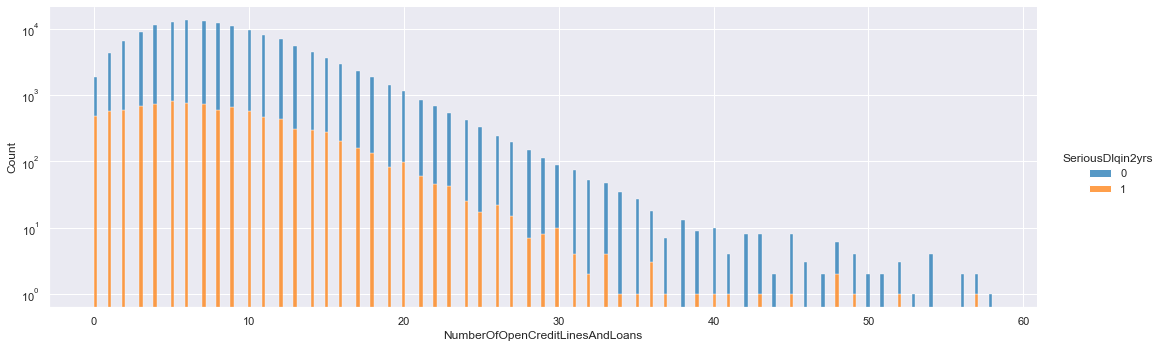

In [31]:
# 违约与未违约样本的公开贷款和信用额度的数量分布
fcg = sns.displot(data=data,
                  x='NumberOfOpenCreditLinesAndLoans',
                  hue='SeriousDlqin2yrs',
                  legend=True,
                  multiple="stack",
                  height=5,
                  aspect=3)
fcg.ax.set_yscale('log')

违约与未违约样本的公开贷款和信用额度数量的在0-30之间的分布基本一致。

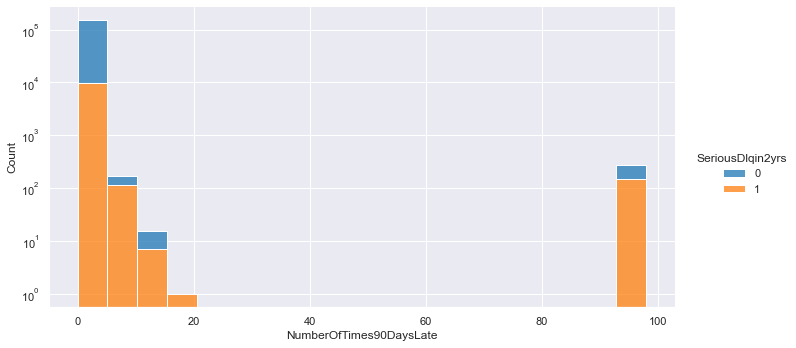

In [32]:
# 违约与未违约样本的NumberOfTimes90DaysLate统计
fcg = sns.displot(data=data,
                  x='NumberOfTimes90DaysLate',
                  hue='SeriousDlqin2yrs',
                  legend=True,
                  multiple="stack",
                  height=5,
                  aspect=2)
fcg.ax.set_yscale('log')

确保每个桶内有正样本，根据可视化结果得出的bins=
`[-math.inf, 0, 1, 2, 3, 4, 5, 6, 8, 20, math.inf]`

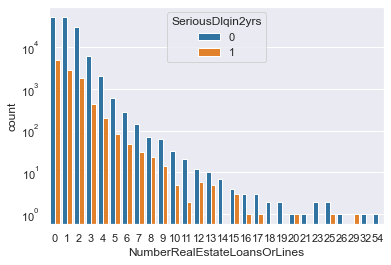

In [33]:
# 违约与未违约样本的 NumberRealEstateLoansOrLines
ax = sns.countplot(
    data=data,
    x='NumberRealEstateLoansOrLines',
    hue='SeriousDlqin2yrs',
)

ax.set_yscale('log')

为了保证5个桶每个桶内有正样本，bins可以为`[-math.inf, 0, 1, 2, 3, math.inf]`

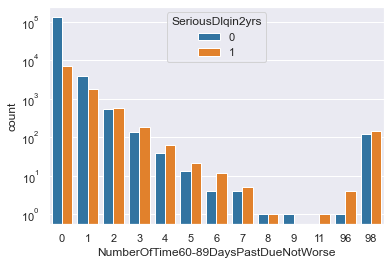

In [34]:
# 违约与未违约样本的NumberOfTime60-89DaysPastDueNotWorse分布
ax = sns.countplot(
    data=data,
    x='NumberOfTime60-89DaysPastDueNotWorse',
    hue='SeriousDlqin2yrs',
)

ax.set_yscale('log')

为了保证10个桶每个桶内有正样本，bins可以为`[-math.inf, 0, 1, 2, 3, 4, 5, 6, 7, 96, math.inf]`

In [35]:
# 违约与未违约样本的NumberOfDependents 的分布
data['NumberOfDependents'].value_counts()

0     90826
1     26316
2     19522
3      9483
4      2862
5       746
6       158
7        51
8        24
10        5
9         5
20        1
13        1
Name: NumberOfDependents, dtype: int64

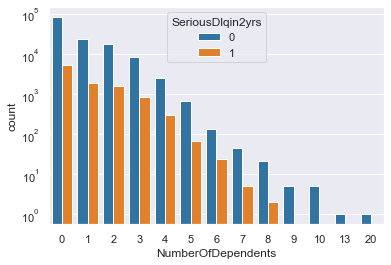

In [36]:
ax = sns.countplot(
    data=data,
    x='NumberOfDependents',
    hue='SeriousDlqin2yrs',
)
ax.set_yscale('log')

为了保证6个桶每个桶内有正样本，bins可以为`[-math.inf, 0, 1, 2, 3, 4, math.inf]`

In [37]:
dataset = data.copy()

 数据分箱

In [45]:
# RevolvingUtilizationOfUnsecuredLines分5箱
dataset['RevolvingUtilizationOfUnsecuredLines_bins'] = pd.qcut(
    dataset['RevolvingUtilizationOfUnsecuredLines'], q=5)

dataset['RevolvingUtilizationOfUnsecuredLines_bins'].value_counts()

(0.699, 50708.0]    30000
(0.271, 0.699]      30000
(0.0832, 0.271]     30000
(0.0192, 0.0832]    30000
(-0.001, 0.0192]    30000
Name: RevolvingUtilizationOfUnsecuredLines_bins, dtype: int64

In [46]:
# age分6箱
age_bins = [-math.inf, 30, 40, 50, 60, 70, math.inf]
dataset['age_bins'] = pd.cut(dataset['age'], age_bins)
dataset['age_bins'].value_counts()

(40.0, 50.0]    35037
(50.0, 60.0]    34806
(60.0, 70.0]    27424
(30.0, 40.0]    24339
(70.0, inf]     17636
(-inf, 30.0]    10758
Name: age_bins, dtype: int64

In [47]:
# NumberOfTime30-59DaysPastDueNotWorse分10桶
bins = [-math.inf, 0, 1, 2, 3, 4, 5, 6, 7, 8, math.inf]
dataset['NumberOfTime30-59DaysPastDueNotWorse_bins'] = pd.cut(
    dataset['NumberOfTime30-59DaysPastDueNotWorse'], bins=bins)

dataset['NumberOfTime30-59DaysPastDueNotWorse_bins'].value_counts()

(-inf, 0.0]    126018
(0.0, 1.0]      16033
(1.0, 2.0]       4598
(2.0, 3.0]       1754
(3.0, 4.0]        747
(4.0, 5.0]        342
(8.0, inf]        289
(5.0, 6.0]        140
(6.0, 7.0]         54
(7.0, 8.0]         25
Name: NumberOfTime30-59DaysPastDueNotWorse_bins, dtype: int64

In [48]:
# DebtRatio分5桶
# bins = [-math.inf, 0.1, 0.25, 0.4, 0.9, math.inf] # iv=0.02760

bins = [-math.inf, 0.2, 0.4, 0.6, 3, math.inf]   # iv=0.06647
dataset['DebtRatio_bins'] = pd.cut(dataset['DebtRatio'], bins)

dataset['DebtRatio_bins'].value_counts()

(-inf, 0.2]    42289
(0.2, 0.4]     38284
(3.0, inf]     30283
(0.4, 0.6]     21522
(0.6, 3.0]     17622
Name: DebtRatio_bins, dtype: int64

In [49]:
# MonthlyIncome 分5桶

bins = [-math.inf, 3200.0, 4200, 5200, 7000, math.inf] # 0.066897
dataset['MonthlyIncome_bins'] = pd.cut(dataset['MonthlyIncome'], bins)
dataset['MonthlyIncome_bins'].value_counts()

(5200.0, 7000.0]    51413
(7000.0, inf]       40475
(-inf, 3200.0]      27539
(3200.0, 4200.0]    15916
(4200.0, 5200.0]    14657
Name: MonthlyIncome_bins, dtype: int64

In [50]:
# NumberOfOpenCreditLinesAndLoans分5桶
bins = [-math.inf, 0, 1, 2, 3, math.inf]  # iv=0.10128
dataset['NumberOfOpenCreditLinesAndLoans_bins'] = pd.cut(
    dataset['NumberOfOpenCreditLinesAndLoans'], bins)

dataset['NumberOfOpenCreditLinesAndLoans_bins'].value_counts()

(3.0, inf]     127950
(2.0, 3.0]       9058
(1.0, 2.0]       6666
(0.0, 1.0]       4438
(-inf, 0.0]      1888
Name: NumberOfOpenCreditLinesAndLoans_bins, dtype: int64

In [51]:
# NumberOfTimes90DaysLate分10桶
bins = [-math.inf, 0, 1, 2, 3, 4, 5, 6, 8, 20, math.inf]

dataset['NumberOfTimes90DaysLate_bins'] = pd.cut(dataset['NumberOfTimes90DaysLate'], bins)
dataset['NumberOfTimes90DaysLate_bins'].value_counts()

(-inf, 0.0]    141662
(0.0, 1.0]       5243
(1.0, 2.0]       1555
(2.0, 3.0]        667
(3.0, 4.0]        291
(20.0, inf]       269
(4.0, 5.0]        131
(5.0, 6.0]         80
(6.0, 8.0]         59
(8.0, 20.0]        43
Name: NumberOfTimes90DaysLate_bins, dtype: int64

In [52]:
# NumberRealEstateLoansOrLines分5段
bins = [-math.inf, 0, 1, 2, 3, math.inf]
dataset['NumberRealEstateLoansOrLines_bins'] = pd.cut(
    dataset['NumberRealEstateLoansOrLines'], bins=bins)


dataset['NumberRealEstateLoansOrLines_bins'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: NumberRealEstateLoansOrLines_bins, dtype: int64

In [53]:
# NumberOfTime60-89DaysPastDueNotWorse分10段
bins = [-math.inf, 0, 1, 2, 3, 4, 5, 6, 7, 96, math.inf]  # iv=0.600696

dataset['NumberOfTime60-89DaysPastDueNotWorse_bins'] = pd.cut(
    dataset['NumberOfTime60-89DaysPastDueNotWorse'], bins)
dataset['NumberOfTime60-89DaysPastDueNotWorse_bins'].value_counts()

(-inf, 0.0]    142396
(0.0, 1.0]       5731
(1.0, 2.0]       1118
(2.0, 3.0]        318
(96.0, inf]       264
(3.0, 4.0]        105
(4.0, 5.0]         34
(5.0, 6.0]         16
(7.0, 96.0]         9
(6.0, 7.0]          9
Name: NumberOfTime60-89DaysPastDueNotWorse_bins, dtype: int64

In [54]:
# NumberOfDependents分6桶
# bins = [-math.inf, 2, 4, 6, 8, 10, math.inf] # iv=0.01451

bins = [-math.inf, 0, 1, 2, 3, 4, math.inf]  # iv=0.03445
dataset['NumberOfDependents_bins'] = pd.cut(dataset['NumberOfDependents'], bins)

dataset['NumberOfDependents_bins'].value_counts()

(-inf, 0.0]    90826
(0.0, 1.0]     26316
(1.0, 2.0]     19522
(2.0, 3.0]      9483
(3.0, 4.0]      2862
(4.0, inf]       991
Name: NumberOfDependents_bins, dtype: int64

In [55]:
# 将前面10个特征的分箱策略封装到函数中
def get_cut(dataset):
    dataset['RevolvingUtilizationOfUnsecuredLines_bins'] = pd.qcut(
        dataset['RevolvingUtilizationOfUnsecuredLines'], q=5)

    age_bins = [-math.inf, 30, 40, 50, 60, 70, math.inf]
    dataset['age_bins'] = pd.cut(dataset['age'], age_bins)

    bins = [-math.inf, 0, 1, 2, 3, 4, 5, 6, 7, 8, math.inf]
    dataset['NumberOfTime30-59DaysPastDueNotWorse_bins'] = pd.cut(
        dataset['NumberOfTime30-59DaysPastDueNotWorse'], bins=bins)

    bins = [-math.inf, 0.2, 0.4, 0.6, 3, math.inf]  # iv=0.06647
    dataset['DebtRatio_bins'] = pd.cut(dataset['DebtRatio'], bins)

    bins = [-math.inf, 3200.0, 4200, 5200, 7000, math.inf]
    dataset['MonthlyIncome_bins'] = pd.cut(dataset['MonthlyIncome'], bins)

    bins = [-math.inf, 0, 1, 2, 3, math.inf]  # iv=0.10128
    dataset['NumberOfOpenCreditLinesAndLoans_bins'] = pd.cut(
        dataset['NumberOfOpenCreditLinesAndLoans'], bins)

    bins = [-math.inf, 0, 1, 2, 3, 4, 5, 6, 8, 20, math.inf]
    dataset['NumberOfTimes90DaysLate_bins'] = pd.cut(dataset['NumberOfTimes90DaysLate'],
                                                bins)

    bins = [-math.inf, 0, 1, 2, 3, math.inf]
    dataset['NumberRealEstateLoansOrLines_bins'] = pd.cut(
        dataset['NumberRealEstateLoansOrLines'], bins=bins)

    
    bins = [-math.inf, 0, 1, 2, 3, 4, 5, 6, 7, 96, math.inf]  # iv=0.600696
    dataset['NumberOfTime60-89DaysPastDueNotWorse_bins'] = pd.cut(
        dataset['NumberOfTime60-89DaysPastDueNotWorse'], bins)

    bins = [-math.inf, 0, 1, 2, 3, 4, math.inf]  # iv=0.03445
    dataset['NumberOfDependents_bins'] = pd.cut(dataset['NumberOfDependents'], bins)

    return dataset

计算WOE和IV

In [56]:
def get_iv(dataset, col, target_col):
    # 各桶总样本数
    cut_dataset = pd.DataFrame(dataset[col].value_counts().sort_index())

    # label=1时各桶内样本数
    cut_dataset['yi'] = dataset.groupby(col)[target_col].sum()

    # label=0时各桶内样本数
    cut_dataset['ni'] = cut_dataset[col] - cut_dataset['yi']
    cut_dataset['pyi'] = cut_dataset['yi'] / NT_dict[1]
    cut_dataset['pni'] = cut_dataset['ni'] / NT_dict[0]

    # 计算WOE
    cut_dataset['woe_i'] = np.log(cut_dataset['pyi'] / cut_dataset['pni'])
    
    # 将存在inf的值替换为0
    cut_dataset['woe_i'] = cut_dataset['woe_i'].replace({np.inf: 0, -np.inf: 0})
    
    # 计算各桶的iv
    cut_dataset['iv_i'] = cut_dataset['woe_i'] * (cut_dataset['pyi'] - cut_dataset['pni'])
    iv = cut_dataset['iv_i'].sum()
    
    # 每个桶内样本总数
    cut_dataset['all'] = cut_dataset[col].copy()
    cut_dataset[col] = cut_dataset.index
    return  cut_dataset.reset_index(drop=True), iv

In [57]:
bins_cols = dataset.columns[dataset.columns.str.endswith('bins')]
bins_cols

Index(['RevolvingUtilizationOfUnsecuredLines_bins', 'age_bins',
       'NumberOfTime30-59DaysPastDueNotWorse_bins', 'DebtRatio_bins',
       'MonthlyIncome_bins', 'NumberOfOpenCreditLinesAndLoans_bins',
       'NumberOfTimes90DaysLate_bins', 'NumberRealEstateLoansOrLines_bins',
       'NumberOfTime60-89DaysPastDueNotWorse_bins', 'NumberOfDependents_bins'],
      dtype='object')

In [58]:
iv_list = []

dataset_new = dataset.copy()
for f in bins_cols:
    dataset_woe, iv = get_iv(dataset, f, 'SeriousDlqin2yrs')
    iv_list.append(iv)
    dataset_woe.columns = [c if c == f else c + '_' + f for c in dataset_woe.columns]
    dataset_new = dataset_new.merge(dataset_woe, on=f, how='left')

In [59]:
iv_list

[1.0596188771423887,
 0.24235781794699962,
 0.7608635821351128,
 0.06646851124629055,
 0.06689666799825622,
 0.10128300712714187,
 0.8802938215956659,
 0.06167337290177645,
 0.6006964135189669,
 0.03445663226108044]

In [60]:
dataset_new.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,woe_i_NumberOfTime60-89DaysPastDueNotWorse_bins,iv_i_NumberOfTime60-89DaysPastDueNotWorse_bins,all_NumberOfTime60-89DaysPastDueNotWorse_bins,yi_NumberOfDependents_bins,ni_NumberOfDependents_bins,pyi_NumberOfDependents_bins,pni_NumberOfDependents_bins,woe_i_NumberOfDependents_bins,iv_i_NumberOfDependents_bins,all_NumberOfDependents_bins
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,-0.288208,0.069673,142396,1584,17938,0.157989,0.128152,0.209307,0.006245,19522
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,-0.288208,0.069673,142396,1935,24381,0.192998,0.174182,0.102578,0.001930,26316


In [61]:
# 根据IV > 0.1 选择特征
choose_feats = []
for c, iv in zip(bins_cols, iv_list):
    if iv > 0.1:
        choose_feats.append(c[:-5])

In [62]:
choose_feats

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [63]:
# WOE的规则
dataset_bin_to_woe = pd.DataFrame(columns=['features', 'bin', 'woe'])
woe_cols = []
for f in choose_feats:
    b = f + "_bins"
    w = 'woe_i_' + b
    woe_cols.append(w)
    dataset_ = dataset_new[[w, b]].drop_duplicates()
    dataset_.columns = ['woe', 'bin']
    dataset_['features'] = f
    dataset_bin_to_woe = pd.concat((dataset_bin_to_woe, dataset_))

dataset_bin_to_woe.tail()

,features,bin,woe
1733,NumberOfTime60-89DaysPastDueNotWorse,"(96.0, inf]",2.803329
2406,NumberOfTime60-89DaysPastDueNotWorse,"(3.0, 4.0]",3.121783
6664,NumberOfTime60-89DaysPastDueNotWorse,"(5.0, 6.0]",3.734887
16642,NumberOfTime60-89DaysPastDueNotWorse,"(6.0, 7.0]",2.859419
23964,NumberOfTime60-89DaysPastDueNotWorse,"(7.0, 96.0]",3.329422


In [64]:
# 建模建立
woe_cols

['woe_i_RevolvingUtilizationOfUnsecuredLines_bins',
 'woe_i_age_bins',
 'woe_i_NumberOfTime30-59DaysPastDueNotWorse_bins',
 'woe_i_NumberOfOpenCreditLinesAndLoans_bins',
 'woe_i_NumberOfTimes90DaysLate_bins',
 'woe_i_NumberOfTime60-89DaysPastDueNotWorse_bins']

In [66]:
# 拆分数据集
X_train, Y_train = dataset_new[woe_cols].values, dataset_new['SeriousDlqin2yrs'].values
x_train, x_test, y_train, y_test = train_test_split(X_train,
                                                    Y_train,
                                                    test_size=0.2,
                                                    random_state=33)

In [67]:
# 训练模型
model = LogisticRegression(random_state=33)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9373666666666667

In [68]:
roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

0.8543868625124428

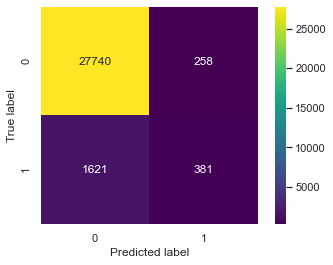

In [69]:
# 混淆矩阵
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='.0f',
            cmap='viridis',
            square=True)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 评分卡

In [70]:
# 斜率和截距
model.coef_, model.intercept_

(array([[ 0.64648533,  0.45061438,  0.51769979, -0.08707337,  0.53642847,
          0.37460909]]),
 array([-2.5953335]))

In [71]:
A, B = 650, 72.13

# 模型基准分
base_score = int(A - B * model.intercept_)

"当A={}, B={}时，我们的模型基准分为: {}".format(A, B, base_score)

'当A=650, B=72.13时，我们的模型基准分为: 837'

In [72]:
# 生成评分卡模型
def generate_scorecard(model, dataset_bin_to_woe, choose_feats, B):
    score_dataset = dataset_bin_to_woe.copy()
    score_dataset['score'] = 0
    # 模型系数
    coef = model.coef_[0]
    for i in range(len(choose_feats)):
        mask = score_dataset['features'] == choose_feats[i]
        # 计算 - B * 线性回归输出
        score_dataset.loc[mask, 'score'] = round((-B) * coef[i] * score_dataset.loc[mask, 'woe']).astype(int)
    # 去掉woe列    
    score_dataset.drop(columns='woe', inplace=True)
    score_dataset.columns = ['Variable', 'Binning', 'Score']
    return score_dataset


score_card = generate_scorecard(model, dataset_bin_to_woe, choose_feats, B)
score_card.head()

,Variable,Binning,Score
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",-58
2,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",-2
3,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",40
11,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",60
14,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",67


In [73]:
# 对每个字段按照分数降序排序，查看规则
score_card = score_card.groupby(
    by='Variable',
    as_index=False).apply(lambda x: x.sort_values('Score', ascending=False))

score_card = score_card.reset_index(drop=True)
score_card.head()

,Variable,Binning,Score
0,NumberOfOpenCreditLinesAndLoans,"(-inf, 0.0]",10
1,NumberOfOpenCreditLinesAndLoans,"(0.0, 1.0]",5
2,NumberOfOpenCreditLinesAndLoans,"(1.0, 2.0]",2
3,NumberOfOpenCreditLinesAndLoans,"(2.0, 3.0]",1
4,NumberOfOpenCreditLinesAndLoans,"(3.0, inf]",-1


In [74]:
# 通过评分卡规则 将特征值value转换为分数 
def map_value_to_score(value, feature_bin):
    # Binning列为interval类型数据，支持成员操作符 in，value若在该区间内，则返回True
    mask = feature_bin['Binning'].apply(lambda x: value in x)
    # 通过
    score = feature_bin['Score'].values[mask][0]
    return score


# 使用评分卡模型计算分数
def calculate_score_with_card(sample_dataset, choose_feats, score_card, base_score):
    score_dataset = score_card.set_index('Variable')
    sample_dataset['score'] = 0
    for f in choose_feats:
        # 获得f特征对应的评分卡dataset
        feature_bin = score_dataset.loc[f]
        # 计算score
        sample_dataset['score'] += sample_dataset[f].apply(map_value_to_score, args=(feature_bin, ))
    # 加上基准分
    sample_dataset['score'] += base_score
    return sample_dataset
   

In [75]:
# 随机选择5个没有违约的客户查看评分
good_sample = dataset[dataset['SeriousDlqin2yrs'] == 0].sample(5)
good_sample = good_sample[[f for f in choose_feats]]

calculate_score_with_card(good_sample, choose_feats, score_card, base_score)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
56626,0.261375,55,0,13,0,0,922
127359,0.137621,22,0,2,0,0,902
10254,0.031853,69,1,9,0,0,914
123522,0.633829,41,0,19,0,1,812
76427,0.775872,42,0,8,0,0,814


In [76]:
# 随机选择5个违约客户
bad_sample = dataset[dataset['SeriousDlqin2yrs'] == 1].sample(5)
bad_sample = bad_sample[[f for f in choose_feats]]

calculate_score_with_card(bad_sample, choose_feats, score_card, base_score)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
22555,1.067231,33,1,18,3,5,532
86791,0.701350,48,2,14,0,0,734
59257,1.202247,48,3,9,0,1,660
48437,0.939146,48,0,3,1,0,725
15957,0.163985,34,2,9,0,0,825


In [77]:
print(f"模型中使用了{len(choose_feats)}个特征，该模型基准分: {base_score}:")
print("6个特征的变量范围对应得分如下：")
score_card.columns = ['变量名称', '变量范围', '得分']
score_card

模型中使用了6个特征，该模型基准分: 837:
6个特征的变量范围对应得分如下：


,变量名称,变量范围,得分
0,NumberOfOpenCreditLinesAndLoans,"(-inf, 0.0]",10
1,NumberOfOpenCreditLinesAndLoans,"(0.0, 1.0]",5
2,NumberOfOpenCreditLinesAndLoans,"(1.0, 2.0]",2
3,NumberOfOpenCreditLinesAndLoans,"(2.0, 3.0]",1
4,NumberOfOpenCreditLinesAndLoans,"(3.0, inf]",-1
5,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 0.0]",20
6,NumberOfTime30-59DaysPastDueNotWorse,"(0.0, 1.0]",-34
7,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-60
8,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",-70
9,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-76
